In [1]:
import pandas as pd    #load the data, statistics
import seaborn as sns   #visualize the data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #nominal, categorical
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


train_df = pd.read_csv('../input/train.csv')

# Creating new categories for age
train_df['<10 yrs'] = train_df['Age'].apply(lambda x: 1 if x < 10 else 0)
train_df['>60 yrs'] = train_df['Age'].apply(lambda x: 1 if x > 60 else 0)

selected_columns = train_df.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
print(selected_columns)

#1 is male, 2 is female
#labelEncoder = LabelEncoder()
#selected_columns['Sex'] = labelEncoder.fit_transform(selected_columns['Sex'])

# Define the features (X) and target (y)
X = selected_columns[['Sex', 'Pclass', '<10 yrs', '>60 yrs']]
y = selected_columns['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('pclass', OneHotEncoder(), ['Sex', 'Pclass'])
    ], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)
pclass_feature_names = preprocessor.named_transformers_['pclass'].get_feature_names_out(['Sex','Pclass'])
all_feature_names = list(pclass_feature_names) + ['<10 yrs', '>60 yrs']

# Convert the transformed data back into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)
print(X_transformed_df)

     PassengerId  Survived  Pclass     Sex  <10 yrs  >60 yrs
0              1         0       3    male        0        0
1              2         1       1  female        0        0
2              3         1       3  female        0        0
3              4         1       1  female        0        0
4              5         0       3    male        0        0
..           ...       ...     ...     ...      ...      ...
886          887         0       2    male        0        0
887          888         1       1  female        0        0
888          889         0       3  female        0        0
889          890         1       1    male        0        0
890          891         0       3    male        0        0

[891 rows x 6 columns]
     Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  <10 yrs  >60 yrs
0           0.0       1.0       0.0       0.0       1.0      0.0      0.0
1           1.0       0.0       1.0       0.0       0.0      0.0      0.0
2           1.0       

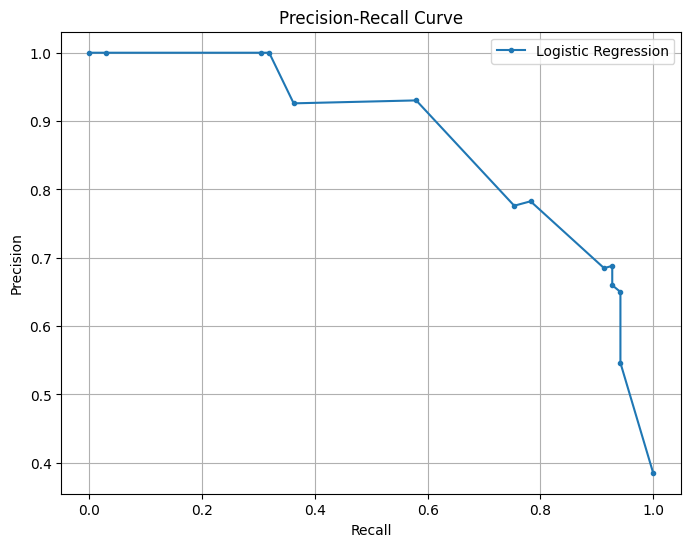

Accuracy: 0.82
Precision: 0.78 of all positive predictions were correct
Recall: 0.75 of all actual positives were predicted
F1: 0.76
Confusion Matrix:
[[95 15]
 [17 52]]


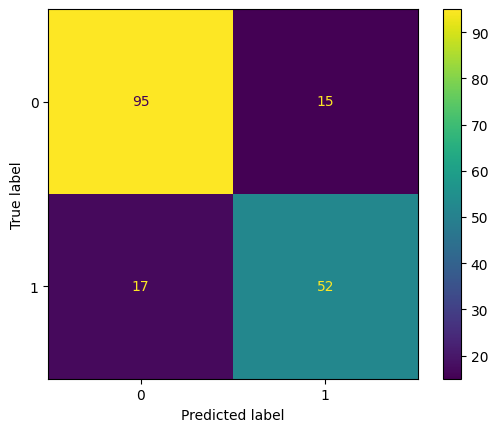

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

#logistic regression
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])
#solvers: 'lbfgs', 'liblinear' or 'saga'


pipeline_lr.fit(X_train, y_train)
prediction = pipeline_lr.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prediction)

precision, recall, thresholds = precision_recall_curve(y_test, prediction)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

#set the threshold with predict proba

############
predictions = pipeline_lr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f} of all positive predictions were correct')
print(f'Recall: {recall:.2f} of all actual positives were predicted')
print(f'F1: {f1:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_lr.classes_)
disp.plot()
print("Confusion Matrix:")
print(cm)